# some reference
1. http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/
2. https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28
3. https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
4. https://gsalvatovallverdu.gitlab.io/python/kernel_density_estimation/

# Example-1: scipy.stats.gaussian_kde

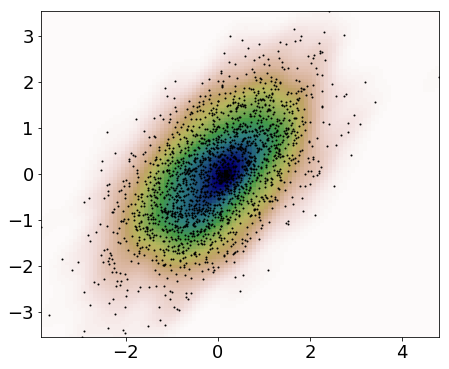

In [90]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
from scipy import stats
import numpy as np 
#Generate some random two-dimensional data:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5,size=n)
    return m1+m2, m1-m2
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

#Perform a kernel density estimate on the data:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] #http://louistiao.me/posts/numpy-mgrid-vs-meshgrid/
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)  #kernel(positions) Evaluate the estimated pdf on a set of points.

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [91]:
values.shape

(2, 2000)

In [14]:
kernel.resample(10).shape

(2, 10)

In [88]:
kernel.dataset.shape

(2, 2000)

In [89]:
values.shape

(2, 2000)

In [34]:
import numpy as np
import scipy as sp
from scipy.stats import gaussian_kde
from scipy.stats import norm
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams["font.size"] = 18

# just for fun
# plt.xkcd(scale=.5, length=50);
print("Numpy: ",np.__version__)
print("Scipy: ",sp.__version__)
print("Pandas: ",pd.__version__)
print("Seaborn: ",sns.__version__)

('Numpy: ', '1.16.5')
('Scipy: ', '1.2.1')
('Pandas: ', u'0.24.2')
('Seaborn: ', '0.9.0')


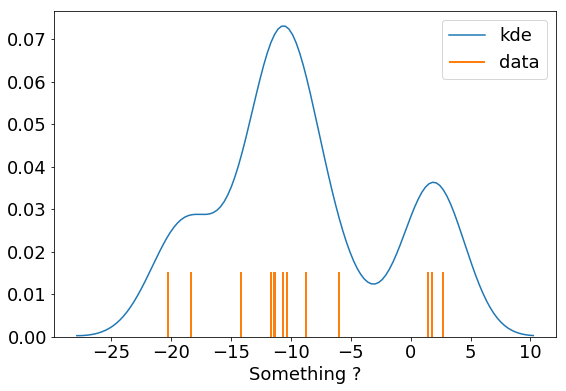

In [49]:
data = [-20.31275116, -18.3594738, -18.3553103, -14.18406452, -11.67305,
        -11.38179997, -11.3761126, -10.6904519, -10.68305023, -10.34148,
         -8.75222277,  -8.7498553, -6.00130727,   1.45761078,   1.77479,
          1.78314794,   2.6612791]

sns.distplot(data, hist=False, rug=True, #rug->orange stick, represent the data points
             axlabel="Something ?",
             kde_kws=dict(label="kde"),
             rug_kws=dict(height=.2, linewidth=2, color="C1", label="data"))
plt.legend();

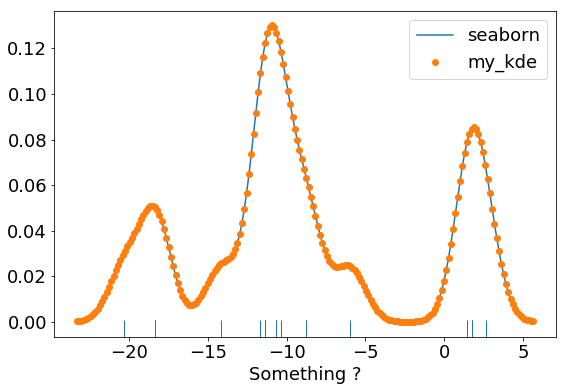

In [51]:
#Compute the gaussian KDE by hands
def my_kde(data, width=1, gridsize=100, normalized=True, bounds=None):
    """
    Compute the gaussian KDE from the given sample.

    Args:
        data (array or list): sample of values
        width (float): width of the normal functions
        gridsize (int): number of grid points on which the kde is computed
        normalized (bool): if True the KDE is normalized (default)
        bounds (tuple): min and max value of the kde

    Returns:
        The grid and the KDE
    """
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)

    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
        kde += norm.pdf(x, loc=val, scale=width)

    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

x, kde = my_kde(data, gridsize=200)
ax = sns.distplot(data, hist=False, rug=True, axlabel="Something ?",
                  kde_kws=dict(gridsize=200, bw=1, label="seaborn"))
ax.plot(x, kde, "o", label="my_kde")
plt.legend();

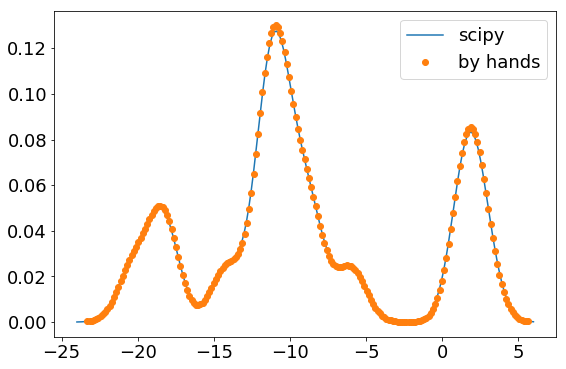

In [52]:
#use scipy kde
# KDE instance
bw = 1. / np.std(data)
g_kde = gaussian_kde(dataset=data, bw_method=bw)

# compute KDE
gridsize = 200
g_x = np.linspace(-24, 6, gridsize)
g_kde_values = g_kde(g_x)  #Evaluate the estimated pdf on a set of points.

plt.plot(g_x, g_kde_values, label="scipy")
plt.plot(x, kde, "o", label="by hands")
plt.legend();

In [54]:
g_kde = gaussian_kde(dataset=data, bw_method="scott")
print("Band width: ", g_kde.factor)
g_kde = gaussian_kde(dataset=data, bw_method="silverman")
print("Band width: ", g_kde.factor)

('Band width: ', 0.5674272856715801)
('Band width: ', 0.6010325090449528)


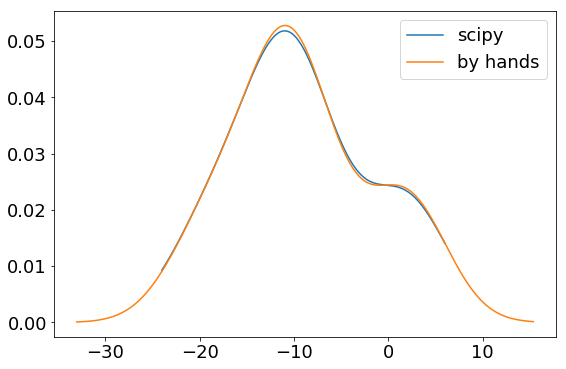

In [55]:
# compute KDE value from gaussian_kde instance
g_kde = gaussian_kde(dataset=data, bw_method="silverman")
g_kde_values = g_kde(g_x)
# our functions with the computed bandwidth
x, kde = my_kde(data, width=g_kde.factor * np.std(data), gridsize=200)
# plot
plt.plot(g_x, g_kde_values, label="scipy")
plt.plot(x, kde, label="by hands")
plt.legend();

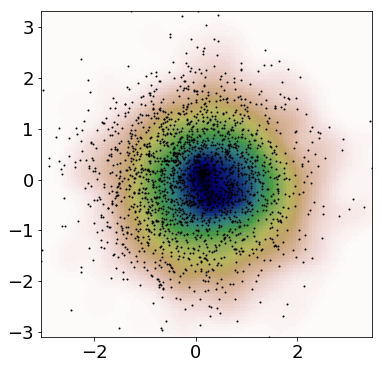

In [84]:
from scipy import stats
import numpy as np 
#Generate some random two-dimensional data:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(size=n)
    return m1, m2
m1, m2 = measure(2000)


#Perform a kernel density estimate on the data:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] #http://louistiao.me/posts/numpy-mgrid-vs-meshgrid/
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions), X.shape)  #kernel(positions) Evaluate the estimated pdf on a set of points.


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [82]:
np.all(np.equal(Z.T,np.rot90(Z)))

False

In [73]:
Z1 = np.reshape(kernel(positions), X.shape)
Z2 = np.reshape(kernel(positions).T, X.shape)
np.all(np.equal(Z1,Z2))

True